<font color = 'blue'> <h1> <center> Processo Seletivo Poli Júnior - 2022.2  </center> </h1> </font> 
    <h2> <center> Núcleo de Produção - Analytics </center> </h2>
    

Olá, boas vindas ao Processo Seletivo 2022.2 da Poli Júnior! Essa é a versão do PS para quem deseja executar um entregável relacionado a área de Analytics.
O entregável de Analytics será exclusivamente feito em Python, usando algumas bibliotecas voltadas para a análise de dados em si. Seguem algumas regras gerais para o entregavel:<ul>
<li>A entrega consiste em enviar esse mesmo arquivo em .ipynb até às 23:59 horas do dia 07/09. <br></li>
<li>Disponibilizamos vídeos para introdução aos conteúdos cobrados, no link: <a href="https://drive.google.com/drive/folders/1zBT60x85c74fe0f9q_W-Y_8D343AAnVY?usp=sharing">https://drive.google.com/drive/folders/1zBT60x85c74fe0f9q_W-Y_8D343AAnVY?usp=sharing</a>
.</li><li> Além disso, há um grupo para tirar dúvidas, no link: <a href="https://chat.whatsapp.com/GTkYdCUpa6eBkIhrGF3epW">https://chat.whatsapp.com/GTkYdCUpa6eBkIhrGF3epW</a><br></li>
<li>Avaliaremos todo o conteúdo feito, não sendo necessesário o preenchimento de todos os itens para prosseguir a etapa de avaliação<br></li>
<li><b>NÃO SE IDENTIFIQUE NO ARQUIVO, APENAS COM O NÚMERO USP NO NOME DO ARQUIVO</b> <br></li>
    <li>Adicione quantas células forem necessárias<br></li>

<li>O resultado será corrigido de acordo com as informações da base, não se preocupe em ir atrás de dados on-line<br></li></ul>
<b>Obrigado pela atenção e bom entregável.</b>


# Parte 1: Perguntas diretas

A primeira parte do entregável consiste em perguntas diretas que devem ser respondidas no espaço destinado. A base escolhida contém dados de um famoso site de reviews sobre avaliações de restaurantes europeus, bem como classificações de ranking e faixa de preço.


A base consiste das seguinte colunas:
* Index: índice da linha da base de dados<br>

* Nome: nome do estabelecimento<br>

* Cidade: cidade do estabelecimento<br>

* Estilo culinário: estilos nos quais a cozinha do estabelecimento se enquadra<br>

* Ranking: posicionamento do estabelecimento na cidade <br>

* Nota: Avaliação média do estabelecimento, pode variar de 1 a 5<br>

* Faixa de preço: Categoria de preço <br>







#### Importação das bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

#### Leitura da base de dados

In [2]:
reviews=pd.read_csv('reviews_restaurantes.csv')

# Questão 1 - Limpeza da base  
###  Na coluna "Nota", há valores negativos que não fazem sentido no contexto.

#### a) Informe a quantidade de valores negativos nessa coluna. 






In [3]:
print("O numero de valores negativos encontrados eh de", reviews[np.isnan(reviews['Nota'])].shape[0])

O numero de valores negativos encontrados eh de 9010


#### b) Remova as linhas com os valores da base e refaça a numeração do index.

In [4]:
# Corrige o dataframe removendo as linhas com valores negativos em sua nota
reviews.drop(reviews[np.isnan(reviews['Nota'])].index, inplace=True)
reviews.reset_index(inplace=True)
reviews.drop('index', axis=1, inplace=True)

In [5]:
reviews

,Nome,Cidade,Estilo Culinário,Ranking,Nota,Faixa de Preço,Número de Reviews
0,Bavet,Brussels,"['Italian', 'Belgian', 'European']",1762.0,4.5,NaN,"2,0"
1,Bouillon des Colonies,Paris,['Vegetarian Friendly'],3877.0,4.0,$$ - $$$,"158,0"
2,Restaurante Passos de Fado,Lisbon,"['Portuguese', 'European']",2638.0,4.0,$$ - $$$,"37,0"
3,Ristorante Da Berti,Milan,"['Italian', 'Mediterranean', 'Vegetarian Frien...",974.0,4.0,$$ - $$$,"392,0"
4,Zinc Zinc,Lyon,"['French', 'Bar', 'European', 'Pub']",2475.0,2.5,$$ - $$$,"329,0"
...,...,...,...,...,...,...,...
109005,Nakagawa,Paris,"['Japanese', 'Sushi', 'Asian']",7232.0,4.0,$$ - $$$,"95,0"
109006,Donna Diana,Vienna,"['Italian', 'Mediterranean', 'Pizza']",1521.0,4.0,$$ - $$$,"17,0"
109007,Kacheti,Prague,[],3698.0,3.0,NaN,NaN
109008,Le Bistrot d'Henri,Paris,"['French', 'European', 'Vegetarian Friendly']",281.0,4.5,$$ - $$$,"695,0"


#### Para as questões seguintes, utilize a base obitda como resultado da questão 1
# Questão 2
#### a) Construa um dataframe que contenha as 5 cidades com mais restaurantes avaliados e suas respectivas quantidades. Considerar a quantidade de vezes que as cidades aparecem e não o número de reviews.


In [6]:
class cities():
    city = []
    totalrev = []
    totalcont = []
    
obj = cities()
    
# for loop que passa pelo dataframe lendo suas informacoes
# e armazenando-as nas variaveis e consertando seu formato
for i in range(reviews.shape[0]):
    rep = True
    name = reviews.iloc[i][1]
    rev  = str((reviews.iloc[i][6])).replace(',', '.')
    rev = float(rev)
    if(np.isnan(rev)):
        rev = 0
    

        
    # for loop que testa para que o nome da cidade não se repita
    for j, n in enumerate(obj.city):
        if(n == name):
            rep = False
            k = j

    # armaze na os dados da funcao, criando um novo elemento caso haja
    # a cidade na lista ou somando os dados nos elementos ja existentes
    if(rep):
        obj.city.append(name)
        obj.totalcont.append(1)
        obj.totalrev.append(rev)

    else:    
        obj.totalrev[k] += rev
        obj.totalcont[k] += 1

#Cria os dataframes limitando seu formato ao indicado pela proposta
    
obja = {'Cidade': obj.city, 'Restaurantes avaliados':obj.totalcont}

dfa = pd.DataFrame(data=obja)
dfa.sort_values(by='Restaurantes avaliados', ascending=False, inplace=True)
dfa.reset_index(inplace=True)
dfa.drop('index', axis=1, inplace=True)
dfa.drop(range(5, len(obj.city)), axis=0, inplace=True)

In [7]:
dfa

,Cidade,Restaurantes avaliados
0,London,14233
1,Paris,12969
2,Madrid,7954
3,Barcelona,7438
4,Berlin,6102


#### b) Construa um dataframe que contenha as 5 cidades com menor número de reviews totais em seus restaurantes em ordem do menor para o maior e os respectivos totais.


In [8]:
objb = {'Cidade': obj.city, 'Total de avaliacoes':obj.totalrev}

dfb = pd.DataFrame(data=objb)
dfb.sort_values(by='Total de avaliacoes', inplace=True)
dfb.reset_index(inplace=True)
dfb.drop('index', axis=1, inplace=True)
dfb.drop(range(5, len(obj.city)), axis=0, inplace=True)

In [9]:
dfb

,Cidade,Total de avaliacoes
0,Bratislava,41156.0
1,Ljubljana,41407.0
2,Luxembourg,46337.0
3,Helsinki,64379.0
4,Geneva,84317.0


# Questão 3

#### Construa um dataframe com os 10 melhores restaurantes de Lisboa (Lisbon) com 1 cifrão de acordo com o ranking em ordem do pior para o melhor avaliado. 


In [10]:
class restaurantes():
    nome = []
    ranking = []

    
obj = restaurantes()

'''
for loop que passa por todos os valores das cidades e precos do 
dataframe, testando se condizem com os do enunciado e adicionando-os
ao objeto para o novo dataframe
'''
for i in range(reviews.shape[0]):
    cidade = reviews.iloc[i][1]
    preco = reviews.iloc[i][5]
    if(cidade == 'Lisbon' and preco == '$'):
        obj.nome.append(reviews.iloc[i][0])
        obj.ranking.append(reviews.iloc[i][3])



# cria o dataframe e o adequa à proposta
objdf = {'Nome':obj.nome, 'Ranking':obj.ranking}
df = pd.DataFrame(data=objdf)
df.sort_values(by='Ranking',inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.drop(range(10, len(obj.nome)), axis=0, inplace=True)
df.sort_values(by='Ranking', ascending=False, inplace=True)

In [11]:
df

,Nome,Ranking
9,Restaurante Sucolento,45.0
8,Alto do Bairro,41.0
7,Frangasqueira Nacional,37.0
6,Floresta Das Escadinhas,34.0
5,Cultura do Hamburguer,33.0
4,Sanskar Nepal,12.0
3,Crisfama,9.0
2,Restaurante Mili,6.0
1,Ha Tapas no Mercado!!!,4.0
0,Estamine Art Food Drink,1.0


# Questão 4

#### a) Determine o estilo culinário que mais aparece dentre os restaurantes avaliados.

#### Dica: Para transformar as listas da coluna "Estilo Culinário", importe a biblioteca ast e se inspire no comando abaixo. Pense nele aplicado em um loop.



In [12]:
class count():
    estilo = []
    cont = []

obj = count()

# for loop que, para cada estilo culinario, conta o seu numero de aparicoes
# atrelando-os as listas do obj
for i in range(reviews.shape[0]):
    str1 = reviews.iloc[i][2]
    estilos = ast.literal_eval(str1)
    for j in range(len(estilos)):
        b = True
        for k in range(len(obj.estilo)):
            if(estilos[j] == obj.estilo[k]):
                b = False

        if(b):
            obj.estilo.append(estilos[j])
            obj.cont.append(1)

        obj.cont[j] += 1
        
        
# Pega o estilo com maior contagem de acordo com as listas formadas no for
estilo = obj.estilo[np.argmax(obj.cont)]


print("O estilo culinario mais presente eh", estilo)

O estilo culinario mais presente eh Italian




1.   Item da lista
2.   Item da lista


#### b) Com base no estilo culinário encontrado acima, monte um dataframe que contenha apenas o melhor restaurante em que esse estilo aparece em cada cidade de acordo com o ranking. O dataframe resultado deve conter 3 colunas: nome do restaurante; cidade; ranking. 
##### Obs: O dataframe não necessariamente deve conter todas as cidades, caso não exista nenhum restaurante desse estilo culinário na cidade.

In [13]:
class restaurantes():
    nome = []
    cidade = []
    ranking = []
    
obj = restaurantes()

#Cria um novo DataFrame com a restrição do estilo culinário e somente com as colunas pedidas
    
for i in range(reviews.shape[0]):
    str1 = reviews.iloc[i][2]
    styles = ast.literal_eval(str1)

    b1 = False
    for j, n in enumerate(styles):
        if(estilo == n):
            b1 = True

    if(b1):
        b2 = False
        b3 = False
        cidade = reviews.iloc[i][1]
        ranking = reviews.iloc[i][3]
        nome = reviews.iloc[i][0]
        for j, n in enumerate(obj.cidade):
            if(cidade == n):
                b2 = True
                if(ranking < obj.ranking[j]):
                    b3 = True
                    m = j

        if(b3):
            obj.ranking[m] = ranking
            obj.nome[m] = nome

        if(not b2):
            obj.cidade.append(cidade)
            obj.nome.append(nome)
            obj.ranking.append(ranking)

objaux = {'Cidade':obj.cidade, 'Ranking':obj.ranking, 'Nome':obj.nome}

dt = pd.DataFrame(data= objaux)

dt = dt.groupby("Cidade")

In [14]:
dt.min()

,Ranking,Nome
Cidade,,
Amsterdam,20.0,La Maschera Lillotatini
Athens,8.0,Oroscopo
Barcelona,12.0,BelleBuon
Berlin,2.0,La Gondola Due
Bratislava,3.0,Gatto Matto Ristorante
Brussels,5.0,Pasta Divina
Budapest,1.0,Comme Chez Soi
Copenhagen,4.0,Pizzeria MaMeMi WestMarket
Dublin,14.0,I Monelli


# Questão 5

#### a) Calcule a média de nota de avaliação dos restaurantes da base.

In [15]:
media = np.mean(reviews['Nota'])
print("A media de nota de avaliacao dos restaurantes eh de", media)

A media de nota de avaliacao dos restaurantes eh de 4.006256306760847



#### b) Construa um dataframe para todas as cidades que possua duas colunas: a cidade; a média de nota de avaliação dos restaurantes dessa cidade.

In [16]:
df = reviews
df = df.groupby("Cidade")
df = df.mean()
df.reset_index(inplace=True)
df = df.drop('Ranking', axis=1)

In [17]:
df

,Cidade,Nota
0,Amsterdam,4.121843
1,Athens,4.212078
2,Barcelona,3.984472
3,Berlin,4.137168
4,Bratislava,3.992045
5,Brussels,3.897778
6,Budapest,4.105607
7,Copenhagen,4.004732
8,Dublin,4.073904
9,Edinburgh,4.084026



#### c) A partir das informações obtidas, construa um gráfico de barras, que contenha no eixo x, as cidades, e no eixo y, a média da nota de avaliação dos restaurantes dessa cidade. Adicione também uma linha horizontal que represente a média geral obtida no item a).

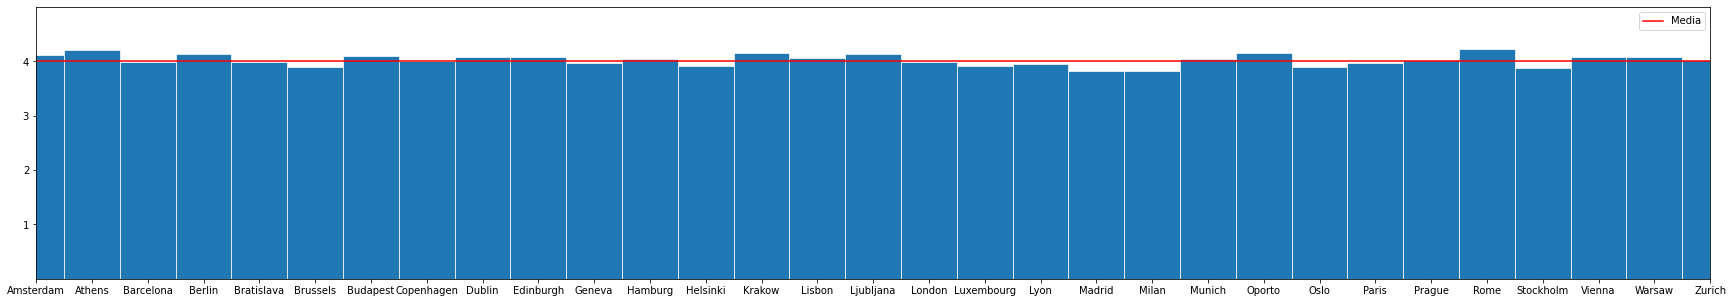

In [18]:
fig, ax = plt.subplots(figsize=(30,5))

x = df['Cidade']
y = df['Nota']

#Plota o gráfico do DataFrame do exercício anterior

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, len(x) - 1), xticks=np.arange(0, len(x)),
       ylim=(0, 5), yticks=np.arange(1, 5))

ax.axhline(media,color='r', label='Media')

ax.legend()

plt.show()

# Parte 2: Análise

Chegamos na segunda parte do entregável!
Aqui será feita uma análise mais ampla do que o exercício anterior, por isso não tem um script com o que deve ser entregue. Por ser mais ampla e a análise variar de pessoa para pessoa, não tem uma única resposta correta. Todo raciocínio desenvolvido será avalidado, inclusive entender o que deve ser abordado ou não na análise.

Usaremos uma base diferente, em que estão representados os resultados da pesquisa de satisfação dos passageiros de uma companhia aérea.

O objetivo aqui é conseguir extrair insights que servirão de diferenciais competitivos para a área de customer service.

Tendo isso em vista, desenvolva uma análise exploratória dessa base de dados, buscando entender quais informações são relevantes para um cliente da companhia responder a pesquisa como satisfeito ou insatisfeito/neutro. Busque entender a relação entre as colunas e para iiotecas para te auxiliar, como: MatPlotLib e Pandas. Disponibilizaremos treinamentos sobre ambas bibliotecas.sso você pode utilizar algumas bibl
Além disso, você pode pesquisar outras bibliotecas disponíveis, como a Scikit-learn, para complementar a sua análise com métodos de Machine Learning como KNN, regressão logística, regressão linear, SVM e árvores de decisão. Lembrando que a utilização desses métodos não é obrigatória.



Explicação das colunas das bases

* Gender : Sexo do passageiro 

* Customer Type : Tipo do cliente 

* Age : Idade do cliente

* Type of Travel : Motivo da viagem

* Class : Tipo de serviço da passagem 

* Flight Distance : Distância percorrida na viagem 

* InFlight Wifi Service : Satisfação com o serviço de wi-fi. (0 representa a inexistência de wi-fi no voo)

* Departure/Arrival time convenient : Nível de satifação com a pontualidade do horário de partida e chegada 

* Ease of online booking : Nível de satisfação com a reserva online  

* Gate location : Nível de satisfação com a localização do portão de embarque

* Food and drink : Nível de satisfação com comidas e bebidas durante o voo 

* Online Boarding  : Nível de satisfação com o check-in online

* Seat Comfort  : Nível de satisfação com o comforto do assento

* Inflight entreteinment  : Nível de satisfação com o entretenimento a bordo

* On-board service  : Nível de satisfação com o serviço em voo

* Leg Room Service  : Nível de satisfação com o espaço para as pernas

* Baggage handling  : Nível de satisfação com o manuseio da bagagem

* Check-in service  : Nível de satisfação com o check-in presencial

* Inflight service  : Nível de satisfação com o serviço de bordo

* Cleanliness   : Nível de satisfação com o limpeza

* Departure delay in minutes : Minutos atrasados da partida voo em minutos

* Arrival delay in minutes  : Minutos atrasados da chegada do voo em minutos

* Satisfaction  : Satisfação com a companhia











In [19]:
customer_df = pd.read_csv('clients_survey.csv')
import seaborn as sns

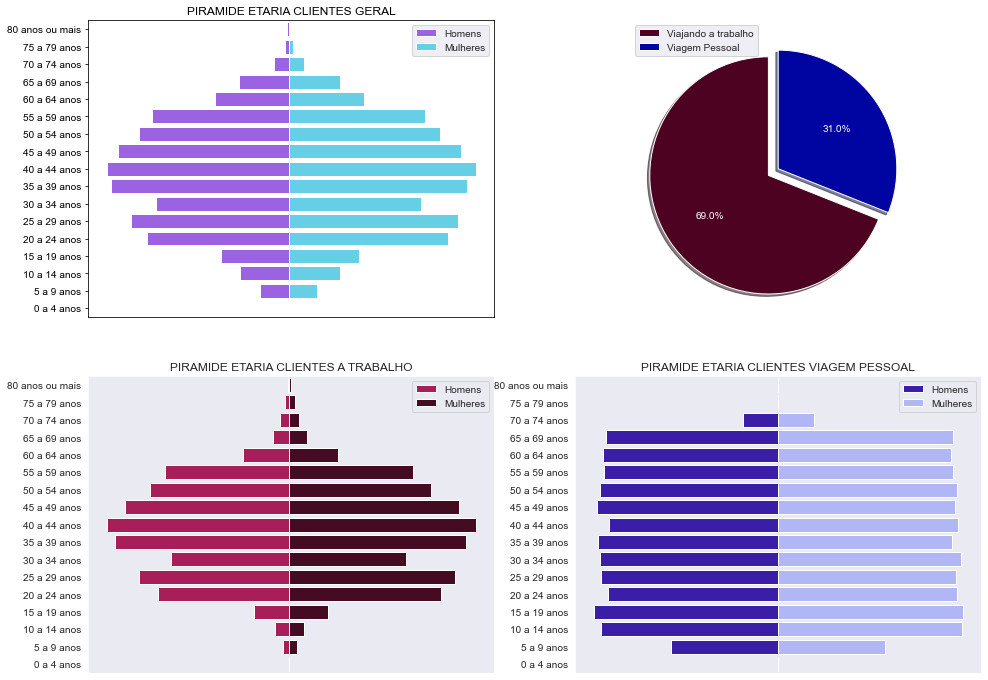

In [20]:
ageLabels = ['0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 24 anos', '25 a 29 anos',
             '30 a 34 anos', '35 a 39 anos', '40 a 44 anos', '45 a 49 anos', '50 a 54 anos', '55 a 59 anos',
             '60 a 64 anos', '65 a 69 anos', '70 a 74 anos', '75 a 79 anos', '80 anos ou mais']


plt.subplots(figsize=(16, 12))



def piramide(df):

    gdf = df[df['Gender'] == 'Male']
    # Faz uma lista com as contagens de indivíduos homens para cada faixa etaria 
    Male = [ gdf[(gdf['Age'] >= i*5) & (gdf['Age'] < (i + 1)*5)].shape[0]*(-1) for i in range(len(ageLabels) - 1) ]
    Male.append(gdf[gdf['Age'] >= 80].shape[0]*(-1))


    gdf = df[df['Gender'] == 'Female']
    # Faz uma lista com as contagens de indivíduos mulheres para cada faixa etaria
    Female = [ gdf[(gdf['Age'] >= i*5) & (gdf['Age'] < (i + 1)*5)].shape[0] for i in range(len(ageLabels) - 1) ]
    Female.append(gdf[gdf['Age'] >= 80].shape[0])

    return Male, Female



# Piramide etaria geral dos clientes
m, f = piramide(customer_df)

plt.subplot(2, 2, 1)

sns.set_style("darkgrid")
    
sns.barplot(x= m, y= ageLabels, order=list(reversed(ageLabels)), color = '#984ef7', label='Homens')
sns.barplot(x= f, y= ageLabels, order=list(reversed(ageLabels)), color = '#52dcfa', label = 'Mulheres')

plt.xticks([])
plt.title('PIRAMIDE ETARIA CLIENTES GERAL')
plt.legend()


# Grafico de pizza da proporção de pessoas a trabalho e em viagens pessoais
bPercent = (customer_df[customer_df['Type of Travel'] == 'Business travel'].shape[0])/(customer_df.shape[0]) * 100
pPercent = (customer_df[customer_df['Type of Travel'] == 'Personal Travel'].shape[0])/(customer_df.shape[0]) * 100

plt.subplot(2, 2, 2)
plt.pie([bPercent, pPercent], labels=['Viajando a trabalho', 'Viagem Pessoal'], autopct='%1.1f%%',
        shadow=True, startangle=90, explode=(0.1, 0), colors=['#4d0222', '#0005a1'], textprops=dict(color = 'w'))
plt.legend()


# Piramide etaria de pessoas cuja viagem é a trabalho
m, f = piramide(customer_df[customer_df['Type of Travel'] == 'Business travel'])

plt.subplot(2, 2, 3)
sns.barplot(x= m, y= ageLabels, order=list(reversed(ageLabels)), color = '#bf0755', label='Homens')
sns.barplot(x= f, y= ageLabels, order=list(reversed(ageLabels)), color = '#4d0222', label = 'Mulheres')

plt.xticks([])
plt.title('PIRAMIDE ETARIA CLIENTES A TRABALHO')
plt.legend()


# Piramide etaria de pessoas cuja viagem é pessoal
m, f = piramide(customer_df[customer_df['Type of Travel'] == 'Personal Travel'])

plt.subplot(2, 2, 4)
sns.barplot(x= m, y= ageLabels, order=list(reversed(ageLabels)), color = '#2e07bf', label='Homens')
sns.barplot(x= f, y= ageLabels, order=list(reversed(ageLabels)), color = '#a5aeff', label = 'Mulheres')

plt.xticks([])
plt.title('PIRAMIDE ETARIA CLIENTES VIAGEM PESSOAL')
plt.legend()

#### Insights:
- Existe um equilíbrio entre a quantidade de homens e mulheres.
- A maior parte dos clientes estão viajando a trabalho e por isso a semelhança entre a pirâmide dos clientes viajando a trabalho e a dos clientes em geral.
- Os clientes em viajem pessoal possuem uma pirâmide etária mais equilibrada, com uma quantidade parecida de pessoas em cada faixa etária.
- Os clientes viajando a trabalho possuem uma pirâmide etária com uma maior concentração de adultos, com idades em torno de 35 a 60 anos, representando trabalhadores com maior experiência no mercado de trabalho.

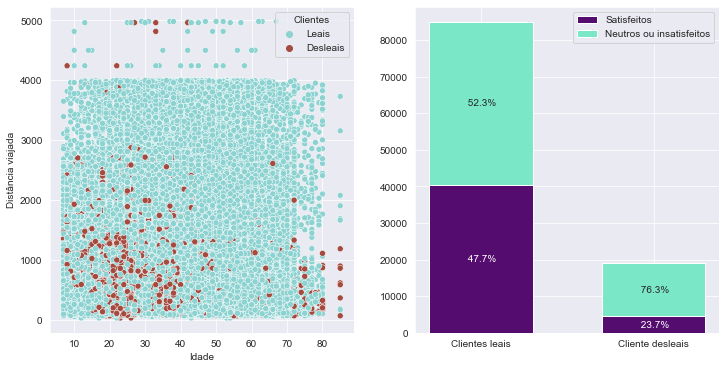

In [21]:


plt.subplots(figsize=(12, 6))


# Faz o scatter dos pontos no gráfico
plt.subplot(1,2,1)
g = sns.scatterplot( x = 'Age', y= 'Flight Distance', hue= 'Customer Type',
                 data=customer_df, palette=['#8CD2D1', '#A44A3F'])
leg = g.get_legend()
leg.set_title('Clientes')
leg.texts[0].set_text('Leais')
leg.texts[1].set_text('Desleais')
plt.xlabel('Idade')
plt.ylabel('Distância viajada')




#Faz o gráfico em barras e seus elementos
labels = ['Clientes leais', 'Cliente desleais']
largura = 0.6

sats = [customer_df[(customer_df['satisfaction'] == 'satisfied') & (customer_df['Customer Type'] == 'Loyal Customer')].shape[0],
        customer_df[(customer_df['satisfaction'] == 'satisfied') & (customer_df['Customer Type'] == 'disloyal Customer')].shape[0]]

unsats = [customer_df[(customer_df['satisfaction'] == 'neutral or dissatisfied') & (customer_df['Customer Type'] == 'Loyal Customer')].shape[0],
        customer_df[(customer_df['satisfaction'] == 'neutral or dissatisfied') & (customer_df['Customer Type'] == 'disloyal Customer')].shape[0]]

percent_sats = [(sats[0]/(sats[0] + unsats[0]))*100, (sats[1]/(sats[1] + unsats[1]))*100]
percent_unsats = [(unsats[0]/(sats[0] + unsats[0]))*100, (unsats[1]/(sats[1] + unsats[1]))*100]


plt.subplot(1,2,2)
bar1 = plt.bar(labels, sats, largura, label='Satisfeitos', color='#540D6E')
bar2 = plt.bar(labels, unsats, largura, label='Neutros ou insatisfeitos', bottom=sats, color='#7AE7C7')

i = 0
for rect in bar1:
    x = rect.get_x() + (largura)/2
    y1 = rect.get_height()/2
    
    plt.text(x, y1, f"{percent_sats[i]: .1f}%", color='w', ha='center', va='center')
  
    

    y2 = y1*2 + (bar2[i].get_height()/2)
    
    plt.text(x, y2, f"{percent_unsats[i]: .1f}%", ha='center', va='center')
    i += 1


plt.legend()

#### Insights:
- Cerca de 81% dos clientes são leais.
- A maioria dos clientes desleais são mais jovens e estão em viajens de menor distância viajada.  
- Os clientes leais são mais satisfeitos com a companhia porém a maior parte dos clientes estão neutros ou insatisfeitos.
- Existem duas áreas de foco para a companhia que são a de manter os clientes leais e criar um vínculo de lealdade com os desleais, devendo investir nas vontades dos clientes neutros e insatisfeitos.

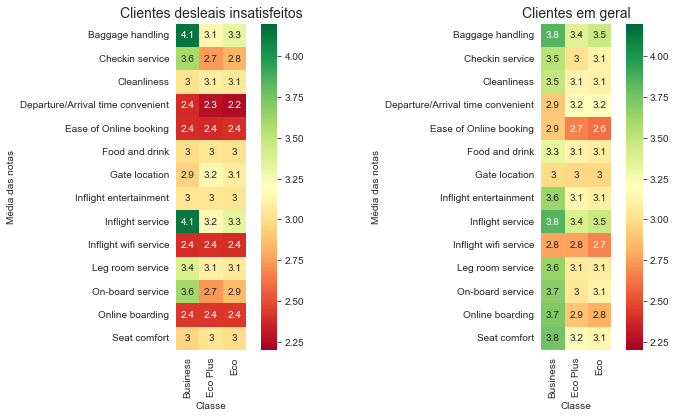

In [22]:
df1 = customer_df[(customer_df['Customer Type'] == 'disloyal Customer') &
 (customer_df['satisfaction'] == 'neutral or dissatisfied')]

plt.subplots(figsize=(12,6))

# Função que monta e plota o um heatmap com o DataFrame fornecido
def heatmap(df, title, order):
    dr = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'satisfaction',
            'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

    df = df.drop(dr, axis=1)

    pv = pd.pivot_table(df, index='Class')
    ordem = ['Business', 'Eco Plus', 'Eco']
    pv.reindex(ordem, axis=0)
    pv = pv.transpose()
    column_order = ['Business', 'Eco Plus', 'Eco']
    pv = pv.reindex(column_order, axis=1)
    
    
    plt.subplot(1,2,order)
    ax = sns.heatmap(pv, square=True, cmap='RdYlGn', annot=True, vmin=2.2, vmax=4.2)
    plt.xlabel('Classe')
    plt.ylabel('Média das notas')
    plt.title(title, fontdict={'size': 14})

heatmap(df1, 'Clientes desleais insatisfeitos', 1)
heatmap(customer_df, 'Clientes em geral', 2)


#### Insights:
- Os clientes desleais insatisfeitos divergiram da opinião geral reclamando mais dos serviços online e de wifi da companhia e da pontualidade dos voos.
- A classe Eco Plus não parece estar trazendo melhora da opinião dos passageiros a respeito do voo em relação à classe Eco, estando estes sempre com notas de avaliação muito similares.
- A classe Business aparenta trazer grandes benefícios às avaliações dos passageiros em alguns tópicos específicos como serviço de bordo ou com o manuseio da bagagem.

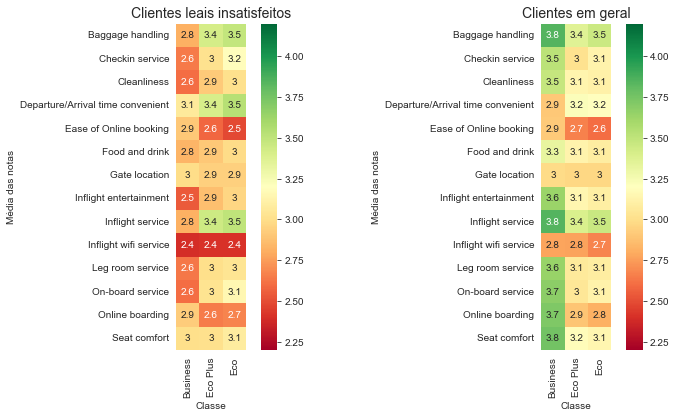

In [23]:
plt.subplots(figsize=(12,6))

df2 = customer_df[(customer_df['Customer Type'] == 'Loyal Customer') &
 (customer_df['satisfaction'] == 'neutral or dissatisfied')]

heatmap(df2, 'Clientes leais insatisfeitos', 1)
heatmap(customer_df, 'Clientes em geral', 2)

#### Insights:
- Os clientes leais insatisfeitos apresentam insatisfação com serviços online porém é menor do que a com os clientes desleais insatisfeitos.
- São principalmente os clientes leais da classe Business que estão com avaliações piores em relação as dos clientes em geral.

C:\Users\Andre\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\Andre\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


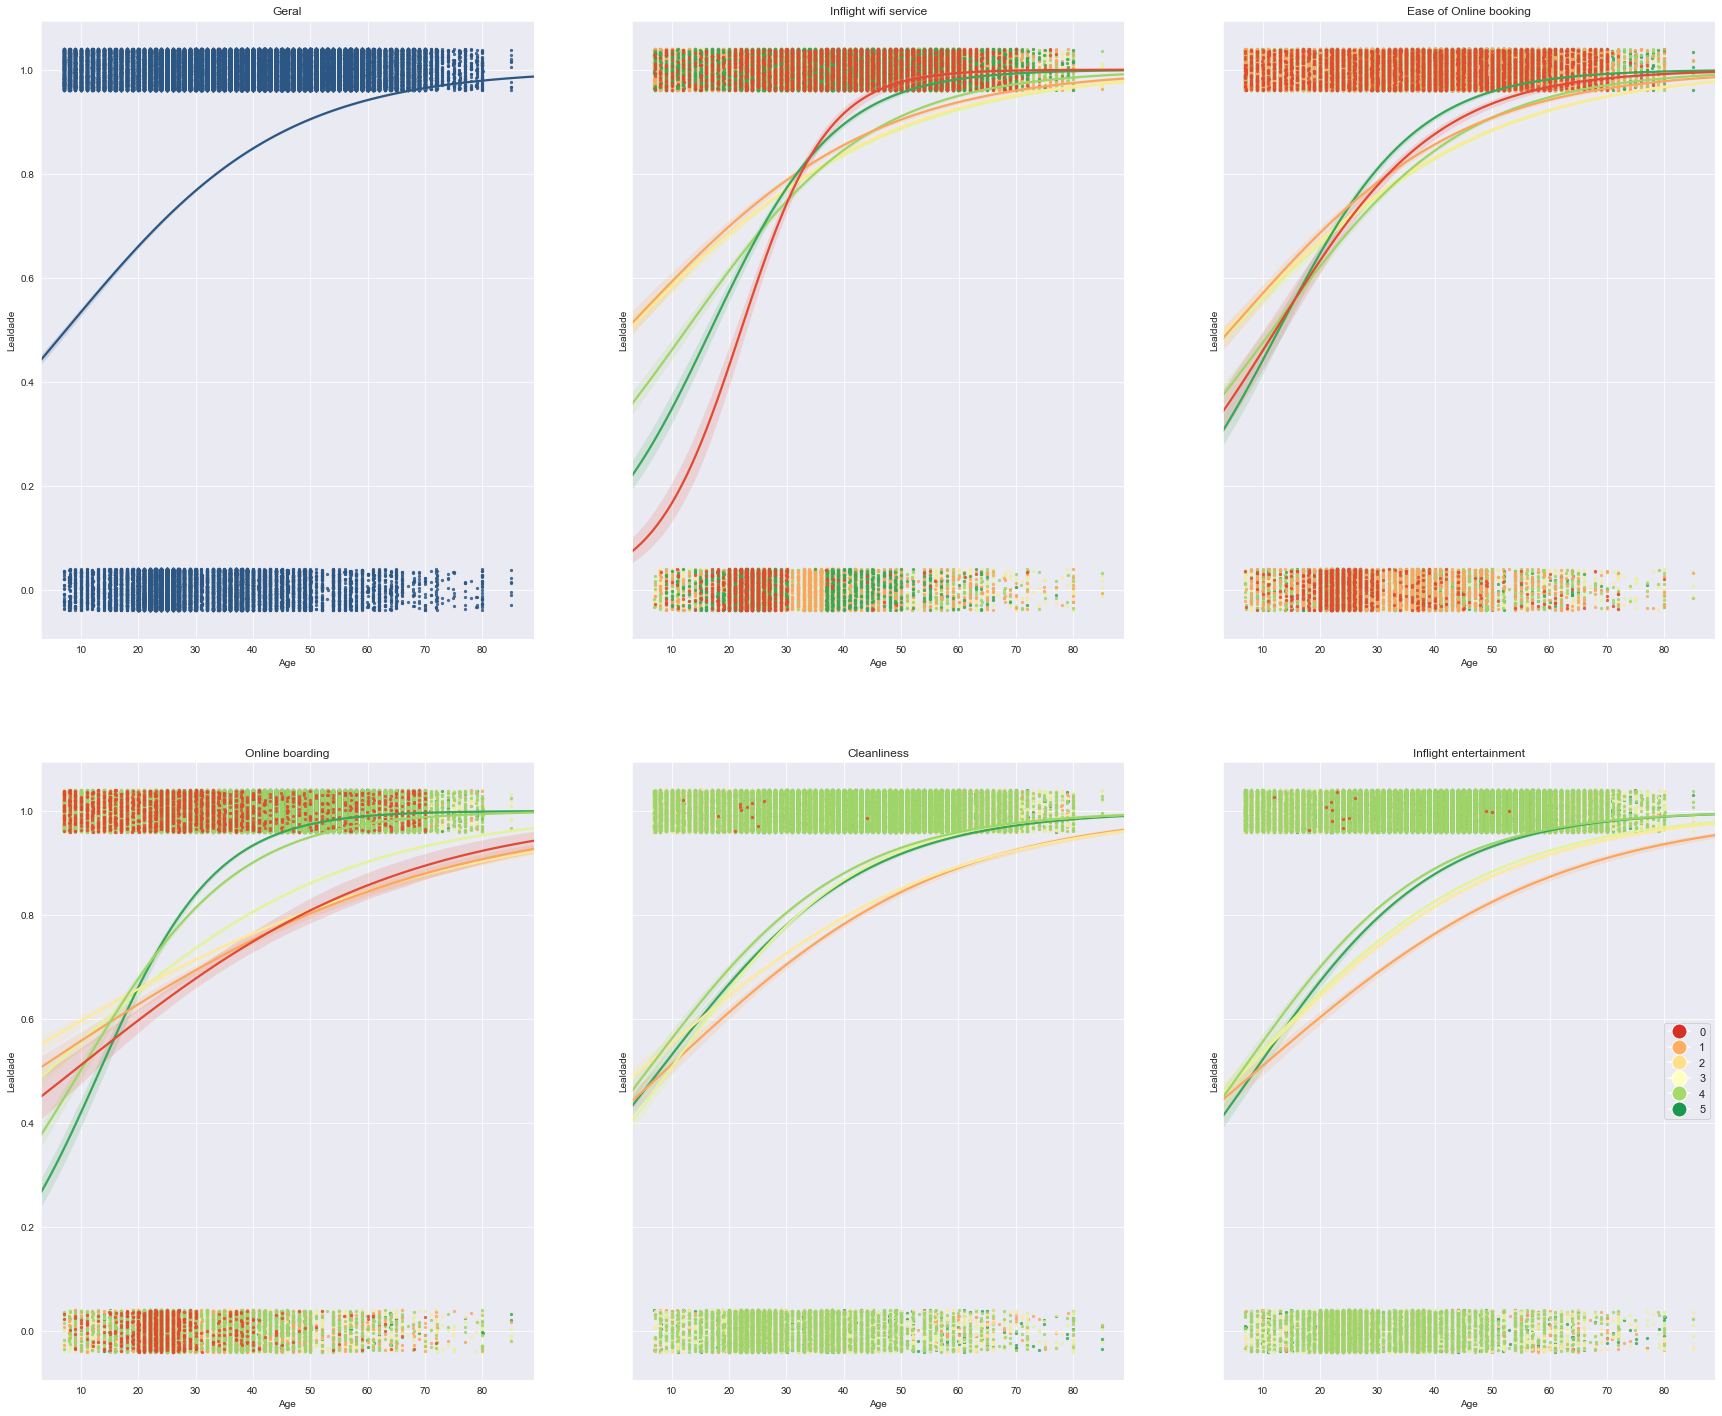

In [24]:
# Demora para executar
from matplotlib.lines import Line2D

# Função utilizada para plotar multiplos gráficos com regressão logística
# com diversas curvas em um mesmo plot
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[int(np.nan_to_num(key))],
                **kwargs
            )
        )
    
    return regplots

fig, axes = plt.subplots(2, 3, figsize=(30, 25), sharey=True)

sns.set_theme(style="darkgrid")


df = customer_df
df['Lealdade'] = df['Customer Type'] == 'Loyal Customer'



sns.regplot(x = 'Age', y = 'Lealdade', data=df, logistic=True, y_jitter=.04, x_jitter=.04, truncate=False,
               color='#2C5784', scatter_kws={'s': 5}, ax=axes[0,0])
axes[0,0].set_title('Geral')



hue_regplot(x = 'Age', y = 'Lealdade', data=df, logistic=True, y_jitter=.04, x_jitter=.04, truncate=False,
                hue='Inflight wifi service', palette=sns.color_palette('RdYlGn'), scatter_kws={'s': 5}, ax=axes[0,1])
axes[0,1].set_title('Inflight wifi service')




hue_regplot(x = 'Age', y = 'Lealdade', data=df, logistic=True, y_jitter=.04, x_jitter=.04, truncate=False,
                 hue='Ease of Online booking', palette=sns.color_palette('RdYlGn'), scatter_kws={'s': 5}, ax=axes[0,2])
axes[0,2].set_title('Ease of Online booking')



hue_regplot(x = 'Age', y = 'Lealdade', data=df, logistic=True, y_jitter=.04, x_jitter=.04, truncate=False,
                hue='Online boarding', palette=sns.color_palette('RdYlGn'), scatter_kws={'s': 5}, ax=axes[1,0])
axes[1,0].set_title('Online boarding')



hue_regplot(x = 'Age', y = 'Lealdade', data=df, logistic=True, y_jitter=.04, x_jitter=.04, truncate=False,
                hue='Cleanliness', palette=sns.color_palette('RdYlGn'), scatter_kws={'s': 5}, ax=axes[1,1])
axes[1,1].set_title('Cleanliness')



hue_regplot(x = 'Age', y = 'Lealdade', data=df, logistic=True, y_jitter=.04, x_jitter=.04, truncate=False,
                hue='Inflight entertainment', palette=sns.color_palette('RdYlGn'), scatter_kws={'s': 5}, ax=axes[1,2])
axes[1,2].set_title('Inflight entertainment')


legend_elements = [Line2D([0], [0], marker='o', color='w', label='0',markerfacecolor='#d73027', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='1',markerfacecolor='#fdae61', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='2',markerfacecolor='#fee08b', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='3',markerfacecolor='#ffffbf', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='4',markerfacecolor='#a6d96a', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='5',markerfacecolor='#1a9850', markersize=15)]


plt.legend(handles=legend_elements)




#### Insights:
- Os clientes mais velhos tendem a ser mais leais à companhia.
- As curvas de regressão logística mostram que em serviços online ou de wifi uma avaliação mais negativa tem impacto considerável na lealdade dos clientes mais jovens e em serviços como limpeza e entretenimento afeta a lealdade dos clientes mais velhos.

### Conclusões:

- O maior público da companhia são adultos de 35 a 60 anos viajando a trabalho que são também os clientes mais leais à empresa, indicando que as medidas de conforto e satisfação estão direcionadas a eles.
- A maioria dos clientes estão neutros ou insatisfeitos com os serviços da empresa e as principais críticas giram em torno dos serviços online e wifi.
- De acordo com as notas dos clientes, a classe Business não está entregando a satisfação esperada pelos clientes, principalmente aos leais, indicando uma piora desse serviço ao longo do tempo.
- A classe Eco Plus também não aparenta estar atribuída a avaliações melhores dos clientes em relação à classe Eco
- Para atrair novos clientes ainda desleais o foco da empresa deve ser agradar os jovens, melhorando seus serviços de internet.
- Para manter os clientes leais da empresa deve focar nos clientes mais velhos melhorando os serviços de internet que, mesmo tendo menor impacto nesse público, ainda são muito mal avaliados e investindo na classe Business que vem tendo notas inferiores ao padrão das outras classes.